In [1]:
import pandas as pd
from utilidades_graficas import *

In [2]:
archivo_resultados = pd.read_excel('out_vv.xlsx')

archivo_resultados.head()

,platform,method,size_a_n,size_a_m,size_b_n,size_b_m,time
0,cuda,punto,1,100,100,1,0.001333
1,cl,punto,1,100,100,1,0.001763
2,numpy,punto,1,100,100,1,0.000013
3,cuda,punto,1,100,100,1,0.000790
4,cl,punto,1,100,100,1,0.000466


In [3]:
plataformas = archivo_resultados['platform'].unique()
metodos = archivo_resultados['method'].unique()
tamaños = archivo_resultados['size_a_m'].unique()
columnas = ['plataforma', 'metodo', 'tamaño', 'tiempo_promedio', 'std_tiempo']
resultados = pd.DataFrame(columns=columnas)

for plataforma in plataformas:
    for metodo in metodos:
        for tamaño in tamaños:
            tabla = archivo_resultados.loc[archivo_resultados['platform'] == plataforma]
            tabla = tabla.loc[tabla['method'] == metodo]
            tabla = tabla.loc[tabla['size_a_m'] == tamaño]
            
            descripcion_tiempo = describir(tabla['time'])            
            valores_fila = [[plataforma, metodo, tamaño] + descripcion_tiempo ]
            fila = pd.DataFrame(valores_fila, columns=columnas)
            resultados = resultados.append(fila, ignore_index=True)
            
resultados.head()

,plataforma,metodo,tamaño,tiempo_promedio,std_tiempo
0,cuda,punto,100,0.000920,0.000247
1,cuda,punto,200,0.001147,0.000604
2,cuda,punto,300,0.000979,0.000222
3,cuda,punto,400,0.000856,0.000169
4,cuda,punto,500,0.000886,0.000139


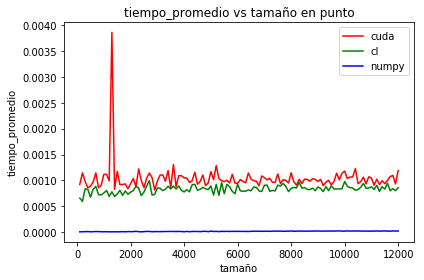

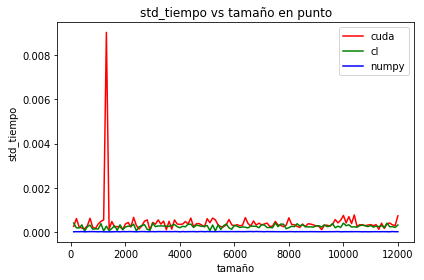

In [4]:
ys = ['tiempo_promedio', 'std_tiempo']
for y in ys:
    for metodo in metodos:
        graficar(resultados, metodo=metodo, x='tamaño', y=y, plataformas=plataformas)